# Knapsack Optimization using Hybrid GA + Local Search

### Create the dataset
OR-Library (via Florida State University mirror)

In [1]:
!pip install requests
!pip install bs4

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np 

def scrape_knapsack_problem_instances():
    base_url = "https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/"
    
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Get all problem prefixes (p01, p02, etc.)
    problem_prefixes = set()
    for link in soup.find_all('a', href=True):
        href = link['href']
        match = re.match(r'(p\d+)', href)
        if match:
            problem_prefixes.add(match.group(1))
    
    problem_instances = []
    
    for prefix in sorted(problem_prefixes):
        print(f"Processing {prefix}...")
        
        try:
            # Initialize problem data for this prefix
            problem_data = {'problem_id': prefix}
            
            # Download all file types for this problem
            file_types = ['c', 'w', 'p', 's']
            
            for file_type in file_types:
                file_url = f"{base_url}{prefix}_{file_type}.txt"
                file_response = requests.get(file_url)
                
                if file_response.status_code == 200:
                    content = file_response.text.strip()
                    
                    if file_type == 'c':  # Capacity
                        problem_data['capacity'] = int(content)
                    else:
                        numbers = []
                        for line in content.split('\n'):
                            line = line.strip()
                            if line and not line.startswith('#'):
                                try:
                                    numbers.extend([int(x) for x in line.split()])
                                except ValueError:
                                    continue
                        
                        if file_type == 'w':
                            problem_data['weights'] = numbers
                        elif file_type == 'p':
                            problem_data['values'] = numbers
                        elif file_type == 's':
                            problem_data['optimal_solution'] = numbers
            
            # Only add if we have the essential data (weights and profits)
            if 'weights' in problem_data and 'values' in problem_data:
                problem_instances.append(problem_data)
            else:
                print(f"Missing essential data for {prefix}")
                            
        except Exception as e:
            print(f"Error processing {prefix}: {e}")
            continue
    
    return problem_instances

# Run the scraper
print("Scraping knapsack problem instances...")
problem_instances = scrape_knapsack_problem_instances()

# Create the DataFrame
df = pd.DataFrame(problem_instances)

# Reorder columns for better readability
column_order = ['problem_id', 'capacity', 'weights', 'values']
if 'optimal_solution' in df.columns:
    column_order.append('optimal_solution')
df = df[column_order]

print(f"\nCreated DataFrame with {len(df)} unique problem instances")
print("Problem IDs:", df['problem_id'].tolist())

# Save to CSV
df.to_csv('knapsack_problem_instances.csv', index=False)
print("\nSaved to 'knapsack_problem_instances.csv'")

# Display all problems briefly
print("\nAll problem instances:")
for _, row in df.iterrows():
    print(f"{row['problem_id']}: {len(row['weights'])} items, capacity {row['capacity']}")

Scraping knapsack problem instances...
Processing p01...
Processing p02...
Processing p03...
Processing p04...
Processing p05...
Processing p06...
Processing p07...
Processing p08...

Created DataFrame with 8 unique problem instances
Problem IDs: ['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08']

Saved to 'knapsack_problem_instances.csv'

All problem instances:
p01: 10 items, capacity 165
p02: 5 items, capacity 26
p03: 6 items, capacity 190
p04: 7 items, capacity 50
p05: 8 items, capacity 104
p06: 7 items, capacity 170
p07: 15 items, capacity 750
p08: 24 items, capacity 6404180


In [4]:
import ast

df = pd.read_csv("knapsack_problem_instances.csv")
df['weights'] = df['weights'].apply(ast.literal_eval)
df['values'] = df['values'].apply(ast.literal_eval)
if 'optimal_solution' in df.columns:
    df['optimal_solution'] = df['optimal_solution'].apply(ast.literal_eval)

df.head(100)

,problem_id,capacity,weights,values,optimal_solution
0,p01,165,"[23, 31, 29, 44, 53, 38, 63, 85, 89, 82]","[92, 57, 49, 68, 60, 43, 67, 84, 87, 72]","[1, 1, 1, 1, 0, 1, 0, 0, 0, 0]"
1,p02,26,"[12, 7, 11, 8, 9]","[24, 13, 23, 15, 16]","[0, 1, 1, 1, 0]"
2,p03,190,"[56, 59, 80, 64, 75, 17]","[50, 50, 64, 46, 50, 5]","[1, 1, 0, 0, 1, 0]"
3,p04,50,"[31, 10, 20, 19, 4, 3, 6]","[70, 20, 39, 37, 7, 5, 10]","[1, 0, 0, 1, 0, 0, 0]"
4,p05,104,"[25, 35, 45, 5, 25, 3, 2, 2]","[350, 400, 450, 20, 70, 8, 5, 5]","[1, 0, 1, 1, 1, 0, 1, 1]"
5,p06,170,"[41, 50, 49, 59, 55, 57, 60]","[442, 525, 511, 593, 546, 564, 617]","[0, 1, 0, 1, 0, 0, 1]"
6,p07,750,"[70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110,...","[135, 139, 149, 150, 156, 163, 173, 184, 192, ...","[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]"
7,p08,6404180,"[382745, 799601, 909247, 729069, 467902, 44328...","[825594, 1677009, 1676628, 1523970, 943972, 97...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, ..."


### Declare the initial population

In [5]:
import random , os
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)

In [6]:
bags = len(df)
pop_size = 100
num_parents = 50
mutation_rate = 0.1
mutation_proba = 0.01
elitism_rate = 0.2

In [7]:
def initialize_population(bag, pop_size):
    """Create initial population for GA"""
    n_items = len(bag['weights'])
    population = np.random.randint(0, 2, (pop_size, n_items))
    return population 

### Fitness Score

In [8]:
# Calculate the fitness score
def call_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)            

### Parents selection

In [9]:
# roulette selection
def selection(fitness, population, num_parents):
    parents = []
    fitness = np.array(fitness, dtype=float)
    total_fitness = np.sum(fitness)

    # Si toutes les fitness sont nulles, donner des chances égales
    if total_fitness == 0:
        probs = np.ones(len(fitness)) / len(fitness)
    else:
        probs = fitness / total_fitness

    for _ in range(num_parents):
        idx = np.random.choice(len(population), p=probs)
        parents.append(population[idx])

    return np.array(parents)

### Crossover

In [10]:
# one point crossover
def crossover(parents):
    offsprings = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i+1]
        if len(parent1) == len(parent2):
            point = random.randint(1, len(parent1)-1)
            offspring1 = np.concatenate((parent1[:point], parent2[point:]))
            offspring2 = np.concatenate((parent2[:point], parent1[point:]))
            offsprings.extend([offspring1, offspring2])
    return np.array(offsprings)

### Mutation

In [11]:
# swap mutation
def mutation(offspring, mutation_rate, mutation_proba=None):
    mutated_offsprings = []
    num_offspring = int(len(offspring) * mutation_rate)
    selected_indices = np.random.choice(len(offspring), size=num_offspring, replace=False)

    for idx in selected_indices:
        offsp = offspring[idx].copy()
        i, j = np.random.choice(len(offsp), 2, replace=False)
        offsp[i], offsp[j] = offsp[j], offsp[i]
        mutated_offsprings.append(offsp)

    return np.array(mutated_offsprings)

### Replacement

In [12]:
def elitist_replacement(fitness, population, elitism_rate, offspring, mutated_offsprings):
    best_pop_size = int(elitism_rate * len(population))
    # Get indices of individuals sorted by fitness descending
    elite_indices = np.argsort(fitness)[-best_pop_size:]
    best_pop = [population[i] for i in elite_indices]

    # Combine elites with offspring and mutated offspring
    new_population = list(offspring) + list(mutated_offsprings) + best_pop

    # Optionally truncate or sample if new_population size exceeds original
    new_population = new_population[:len(population)]
    new_population = np.array(new_population[:len(population)])
    return new_population


### Fitness evolution plot

In [13]:
import matplotlib.pyplot as plt 
def plot_fitness(fitness_history):
    fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
    fitness_history_max = [np.max(fitness) for fitness in fitness_history]
    plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
    plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
    plt.legend()
    plt.title('Fitness through the generations')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.show()

P0 1
Fitness of the last generation: 
[284 284 284 284 284 284 284 284 284 284 284 284 284 284 284 284 284 284
 284 284 284 284 284 284 284 284 284 284 284 284 284 284 284 284 284 284
 284 284 284 284 284 284 284 284 284 284 284 284 284 284 284 259 284   0
   0 284 284 284 284 284 284 284 284 284 284 284 284 284]

The optimized predicted_sol for the given inputs are: 
[1 1 0 1 0 0 1 0 0 0]

Selected items that will maximize the knapsack without breaking it:
1

2

4

7



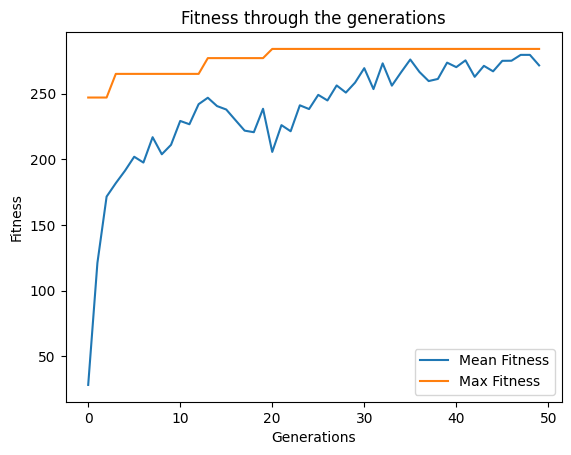

P0 2
Fitness of the last generation: 
[51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51  0 51 44 44  0 51 51 51 51 51 51 51 51 51 51 51 51 51]

The optimized predicted_sol for the given inputs are: 
[0 1 1 1 0]

Selected items that will maximize the knapsack without breaking it:
2

3

4



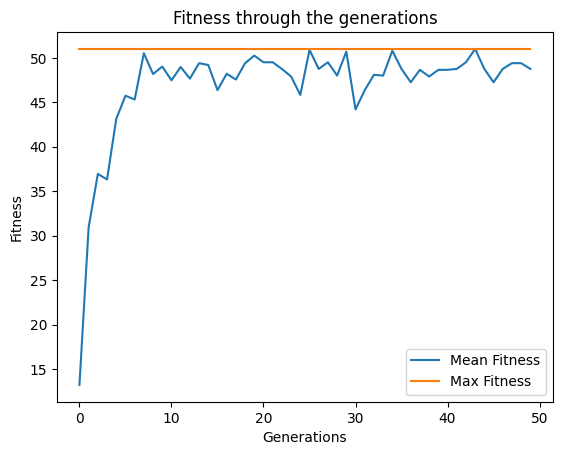

P0 3
Fitness of the last generation: 
[150 150 150 150 146 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 146 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150   0   0 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150]

The optimized predicted_sol for the given inputs are: 
[1 1 0 0 1 0]

Selected items that will maximize the knapsack without breaking it:
1

2

5



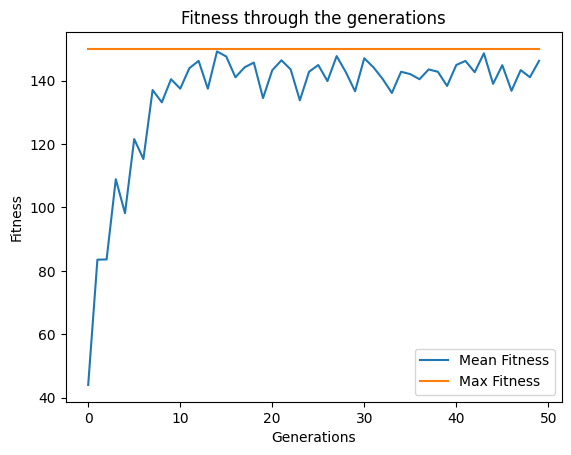

P0 4
Fitness of the last generation: 
[105 105 105 105 105 105 105 105 105 105 105 105 105 105 105  74 105 105
 105 105  35   0 105 105 105 105 105 105 105 105 105 105 105 105 105 105
 105 105 105 105 105 105 105 105 105 105 105 105  35 105 105   0   0   0
   0 105 105 105 105 105 105 105 105 105 105 105 105 105]

The optimized predicted_sol for the given inputs are: 
[1 1 0 0 0 1 1]

Selected items that will maximize the knapsack without breaking it:
1

2

6

7



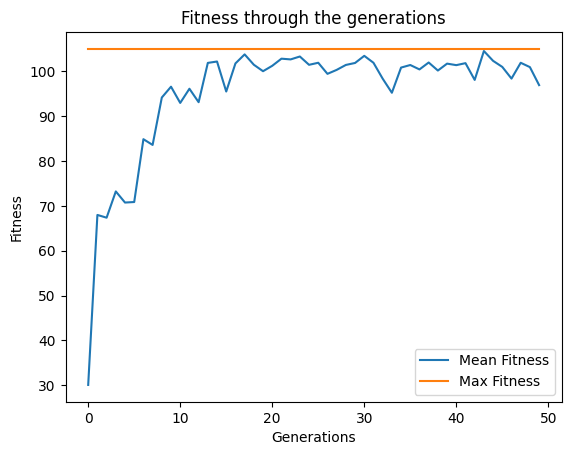

P0 5
Fitness of the last generation: 
[900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900
 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900
 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900
 900 900 900 900 900 900 900 900 900 900 900 900 900 900]

The optimized predicted_sol for the given inputs are: 
[1 0 1 1 1 0 1 1]

Selected items that will maximize the knapsack without breaking it:
1

3

4

5

7

8



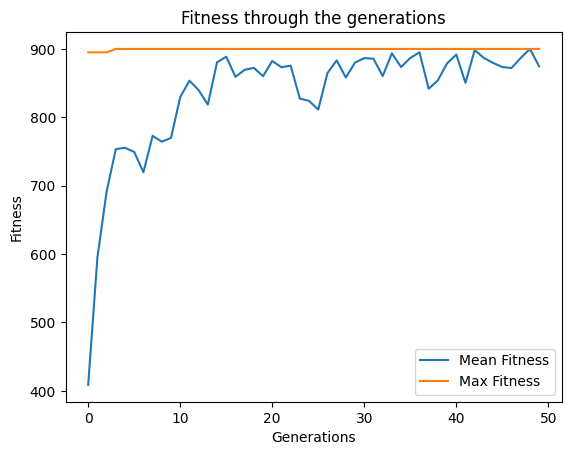

P0 6
Fitness of the last generation: 
[1735 1735 1735 1735 1735 1735 1735 1118 1652 1735 1735 1735 1735 1735
 1735 1735 1735 1735 1735 1735 1735 1735 1735 1652 1735 1653 1735 1735
 1735 1735 1682 1210 1735 1735 1210    0 1735 1653 1653 1735 1735 1735
    0 1210 1735 1735 1735 1735 1118 1735 1682 1584 1735 1653 1735 1735
 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735]

The optimized predicted_sol for the given inputs are: 
[0 1 0 1 0 0 1]

Selected items that will maximize the knapsack without breaking it:
2

4

7



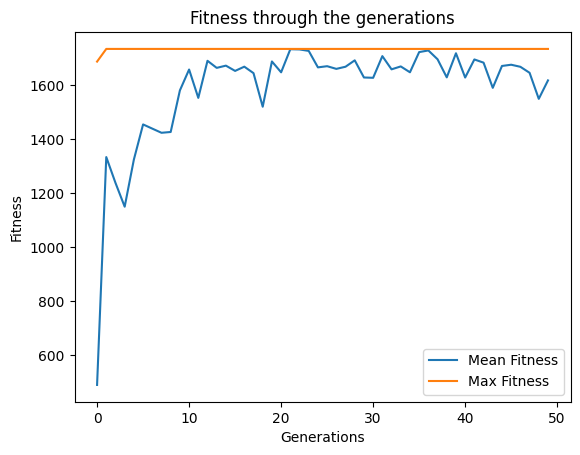

P0 7
Fitness of the last generation: 
[1451 1451 1451 1451 1451 1451 1451 1211 1451 1451 1451 1451 1451 1451
 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451
 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451
 1451 1451 1451 1451 1211 1451 1451 1451    0 1451 1451 1451 1360 1451
 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451]

The optimized predicted_sol for the given inputs are: 
[1 0 0 1 1 0 1 1 1 0 0 0 1 0 1]

Selected items that will maximize the knapsack without breaking it:
1

4

5

7

8

9

13

15



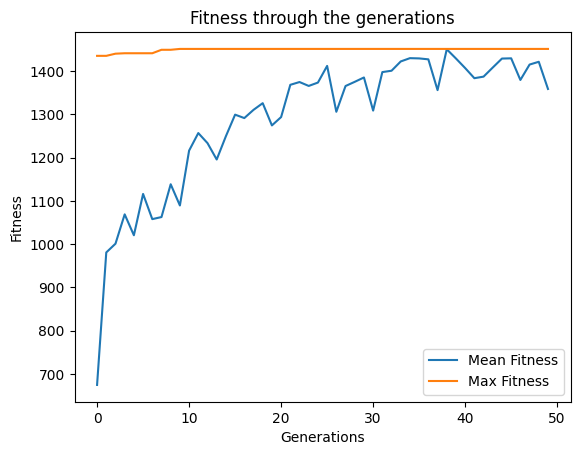

P0 8
Fitness of the last generation: 
[13200018 13200018 13200018 13200018 13200018 13200018 13172258 13200018
 13200018 13200018 13200018 13200018 13200018 13200018 12256046 13200018
 13200018 13200018 13200018 13200018 13200018 13200018 13200018 13200018
 13200018 13200018 13200018 13200018 13200018 12667790 13200018 13172258
 13200018 13200018 12569614 13200018        0 12228286 13200018 13200018
 13200018 12256046 13200018 13200018 13200018 13200018 13200018 13200018
 13200018 13200018 12651483 13200018 13200018 13200018        0 13200018
 13200018 13200018 13200018 13200018 13200018 13200018 13200018 13200018
 13200018 13200018 13200018 13200018]

The optimized predicted_sol for the given inputs are: 
[1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0]

Selected items that will maximize the knapsack without breaking it:
1

4

5

6

9

11

13

15

16

20

21

22

23



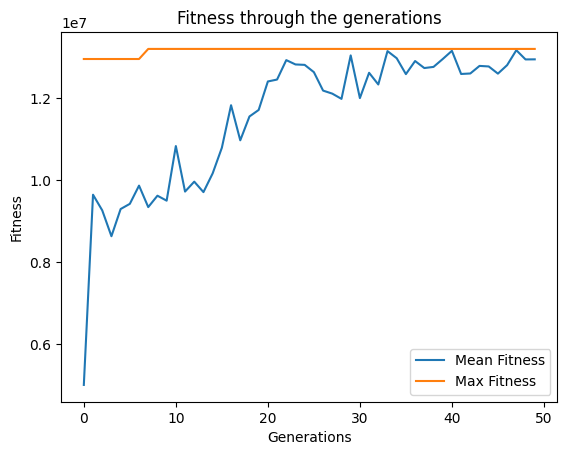

In [15]:
num_generations = 50
populations=[]
fitness_history=[]
predicted_sol = []
true_sol = []
for i in range(bags):
    bag = df.iloc[i]
    weights = bag['weights']
    values = bag['values']
    capacity = bag['capacity']
    optimal_solutions = true_sol.append(bag['optimal_solution'])
    population = initialize_population(bag, pop_size)
    gen = 0
    item_number = np.arange(1,len(weights)+1)
    while (gen < num_generations):
        fitness_scores = call_fitness(weights, values, population, capacity)
        fitness_history.append(fitness_scores)
        parents = selection(fitness_scores, population, num_parents)
        offspring = crossover(parents)
        mutated_offspring = mutation(offspring, mutation_rate, mutation_proba)
        population = elitist_replacement(fitness_scores, population, elitism_rate, offspring, mutated_offspring)
        gen += 1

    print('P0',i+1)
    fitness_last_gen = call_fitness(weights, values, population, capacity)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    predicted_sol.append(population[max_fitness[0][0],:])
    print('The optimized predicted_sol for the given inputs are: \n{}'.format(predicted_sol[-1]))
    selected_items = item_number * predicted_sol[-1]
    
    print('\nSelected items that will maximize the knapsack without breaking it:')
    for i in range(selected_items.shape[0]):
      if selected_items[i] != 0:
         print('{}\n'.format(selected_items[i]))

    plot_fitness(fitness_history)
    fitness_history = []

    


### Accuracy 

In [16]:
import numpy as np

def ga_accuracy(true_sol, predicted_sol):
    accuracies = []
    for true, pred in zip(true_sol, predicted_sol):
        true = np.array(true)
        pred = np.array(pred)
        min_len = min(len(true), len(pred))
        acc = np.sum(true[:min_len] == pred[:min_len]) / min_len
        accuracies.append(acc)
    
    return np.mean(accuracies)

In [19]:
print("The accuracy is: ",ga_accuracy(true_sol,predicted_sol))

The accuracy is: 0.918750


## Local Search

In [20]:
max_iter_ls = 50

### Declare the initial population

In [21]:
def initialize_population_ls(n_items, pop_size):
    return np.random.randint(0, 2, (pop_size, n_items))

### Fitness Score

In [22]:
def call_fitness_ls(weight, value, population, capacity):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= capacity:
            fitness[i] = S1
        else:
            fitness[i] = 0
    return fitness.astype(int)

### Local Search Algorithm

In [23]:
def local_search(individual, weights, values, capacity, max_iter=50):
    best = individual.copy()
    best_fitness = call_fitness(weights, values, best.reshape(1, -1), capacity)[0]
    fitness_history = [best_fitness]

    for _ in range(max_iter):
        improved = False
        for i in range(len(best)):
            neighbor = best.copy()
            neighbor[i] = 1 - neighbor[i]
            total_weight = np.sum(neighbor * weights)
            if total_weight <= capacity:
                neighbor_fitness = call_fitness(weights, values, neighbor.reshape(1, -1), capacity)[0]
                if neighbor_fitness > best_fitness:
                    best = neighbor
                    best_fitness = neighbor_fitness
                    improved = True
        fitness_history.append(best_fitness)
        if not improved:
            break

    gain = best_fitness - fitness_history[0]
    if gain > 0:
        print(f"Local search improved fitness by {gain}")

    return best, best_fitness, fitness_history

Local search improved fitness by 176
Local search improved fitness by 236
Local search improved fitness by 219
Local search improved fitness by 263
Local search improved fitness by 187
Local search improved fitness by 164
Local search improved fitness by 309
Local search improved fitness by 309
Local search improved fitness by 236
Local search improved fitness by 309
Local search improved fitness by 222
Local search improved fitness by 181
Local search improved fitness by 154
Local search improved fitness by 164
Local search improved fitness by 263
Local search improved fitness by 224
Local search improved fitness by 139
Local search improved fitness by 197
Local search improved fitness by 181
Local search improved fitness by 216
Local search improved fitness by 176
Local search improved fitness by 201
Local search improved fitness by 170
Local search improved fitness by 149
Local search improved fitness by 183
Local search improved fitness by 57
Local search improved fitness by 176
Lo

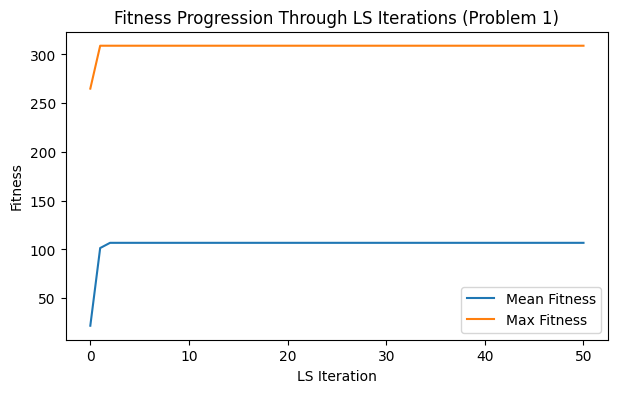


Problem 1:
Best fitness: 309
Accuracy: 1.000
Selected items: [1 2 3 4 6]
Local search improved fitness by 44
Local search improved fitness by 13
Local search improved fitness by 44
Local search improved fitness by 44
Local search improved fitness by 37
Local search improved fitness by 51
Local search improved fitness by 51
Local search improved fitness by 51
Local search improved fitness by 24
Local search improved fitness by 51
Local search improved fitness by 44
Local search improved fitness by 44
Local search improved fitness by 44
Local search improved fitness by 39
Local search improved fitness by 44
Local search improved fitness by 44
Local search improved fitness by 51
Local search improved fitness by 23
Local search improved fitness by 24
Local search improved fitness by 23
Local search improved fitness by 51
Local search improved fitness by 23
Local search improved fitness by 44
Local search improved fitness by 13
Local search improved fitness by 15
Local search improved fitn

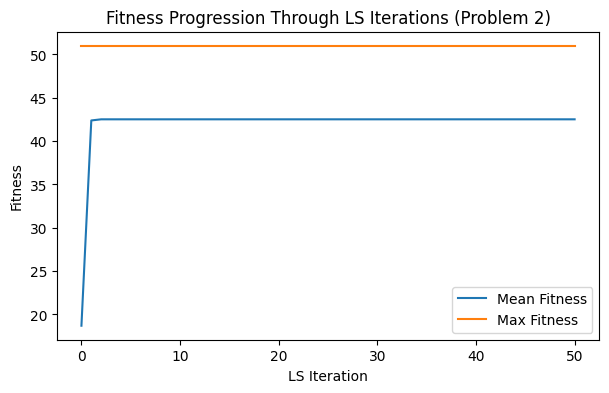


Problem 2:
Best fitness: 51
Accuracy: 1.000
Selected items: [2 3 4]
Local search improved fitness by 105
Local search improved fitness by 5
Local search improved fitness by 115
Local search improved fitness by 101
Local search improved fitness by 50
Local search improved fitness by 146
Local search improved fitness by 101
Local search improved fitness by 46
Local search improved fitness by 101
Local search improved fitness by 101
Local search improved fitness by 105
Local search improved fitness by 101
Local search improved fitness by 5
Local search improved fitness by 119
Local search improved fitness by 5
Local search improved fitness by 50
Local search improved fitness by 119
Local search improved fitness by 46
Local search improved fitness by 146
Local search improved fitness by 150
Local search improved fitness by 119
Local search improved fitness by 119
Local search improved fitness by 115
Local search improved fitness by 100
Local search improved fitness by 100
Local search imp

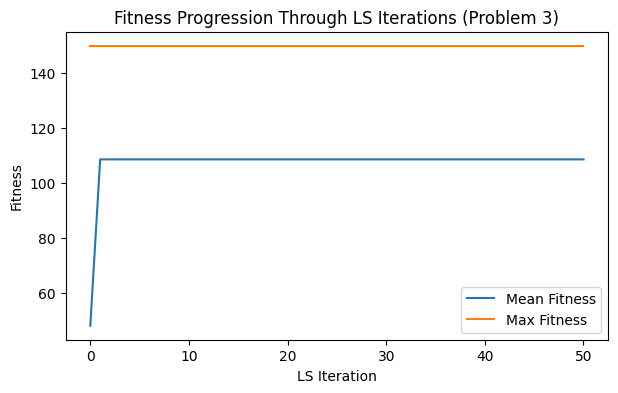


Problem 3:
Best fitness: 150
Accuracy: 1.000
Selected items: [1 2 5]
Local search improved fitness by 81
Local search improved fitness by 7
Local search improved fitness by 81
Local search improved fitness by 81
Local search improved fitness by 79
Local search improved fitness by 5
Local search improved fitness by 79
Local search improved fitness by 10
Local search improved fitness by 37
Local search improved fitness by 81
Local search improved fitness by 27
Local search improved fitness by 79
Local search improved fitness by 96
Local search improved fitness by 93
Local search improved fitness by 20
Local search improved fitness by 97
Local search improved fitness by 12
Local search improved fitness by 81
Local search improved fitness by 82
Local search improved fitness by 79
Local search improved fitness by 81
Local search improved fitness by 77
Local search improved fitness by 82
Local search improved fitness by 7
Local search improved fitness by 30
Local search improved fitness by 

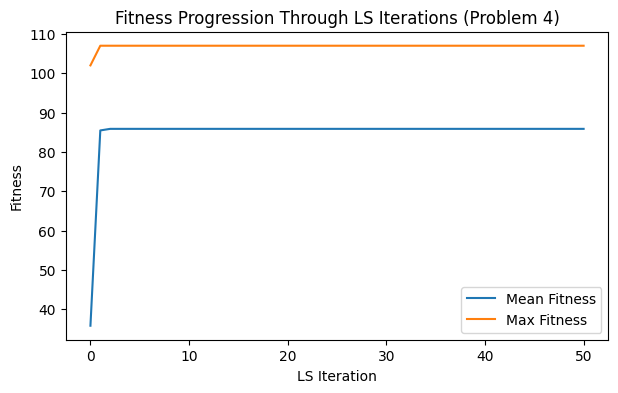


Problem 4:
Best fitness: 107
Accuracy: 1.000
Selected items: [1 4]
Local search improved fitness by 25
Local search improved fitness by 840
Local search improved fitness by 420
Local search improved fitness by 845
Local search improved fitness by 853
Local search improved fitness by 848
Local search improved fitness by 858
Local search improved fitness by 900
Local search improved fitness by 838
Local search improved fitness by 825
Local search improved fitness by 355
Local search improved fitness by 853
Local search improved fitness by 355
Local search improved fitness by 558
Local search improved fitness by 5
Local search improved fitness by 5
Local search improved fitness by 558
Local search improved fitness by 448
Local search improved fitness by 900
Local search improved fitness by 558
Local search improved fitness by 503
Local search improved fitness by 900
Local search improved fitness by 440
Local search improved fitness by 775
Local search improved fitness by 433
Local search

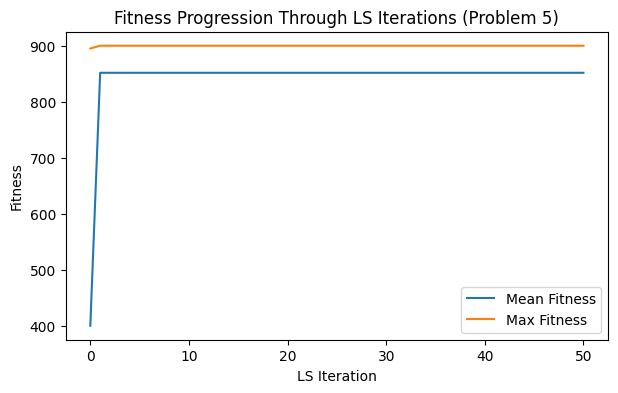


Problem 5:
Best fitness: 900
Accuracy: 1.000
Selected items: [1 3 4 5 7 8]
Local search improved fitness by 1582
Local search improved fitness by 1478
Local search improved fitness by 442
Local search improved fitness by 1674
Local search improved fitness by 442
Local search improved fitness by 1682
Local search improved fitness by 1623
Local search improved fitness by 1668
Local search improved fitness by 953
Local search improved fitness by 442
Local search improved fitness by 1036
Local search improved fitness by 1621
Local search improved fitness by 1635
Local search improved fitness by 511
Local search improved fitness by 1623
Local search improved fitness by 967
Local search improved fitness by 1635
Local search improved fitness by 1605
Local search improved fitness by 1706
Local search improved fitness by 1668
Local search improved fitness by 1629
Local search improved fitness by 1706
Local search improved fitness by 442
Local search improved fitness by 1668
Local search improv

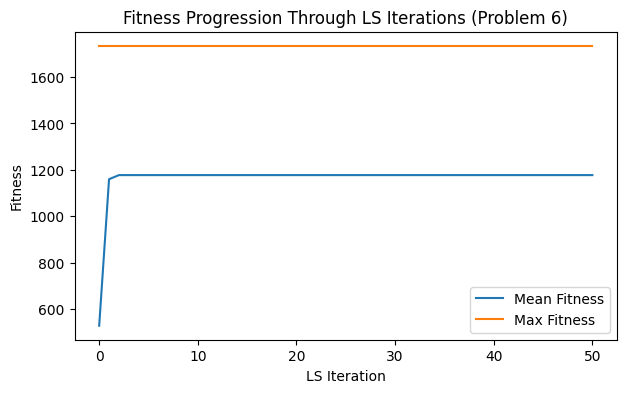


Problem 6:
Best fitness: 1735
Accuracy: 1.000
Selected items: [2 4 7]
Local search improved fitness by 1416
Local search improved fitness by 329
Local search improved fitness by 139
Local search improved fitness by 1357
Local search improved fitness by 135
Local search improved fitness by 299
Local search improved fitness by 139
Local search improved fitness by 958
Local search improved fitness by 135
Local search improved fitness by 1410
Local search improved fitness by 139
Local search improved fitness by 423
Local search improved fitness by 573
Local search improved fitness by 892
Local search improved fitness by 274
Local search improved fitness by 573
Local search improved fitness by 1437
Local search improved fitness by 478
Local search improved fitness by 135
Local search improved fitness by 306
Local search improved fitness by 135
Local search improved fitness by 1448
Local search improved fitness by 1433
Local search improved fitness by 1315
Local search improved fitness by 1

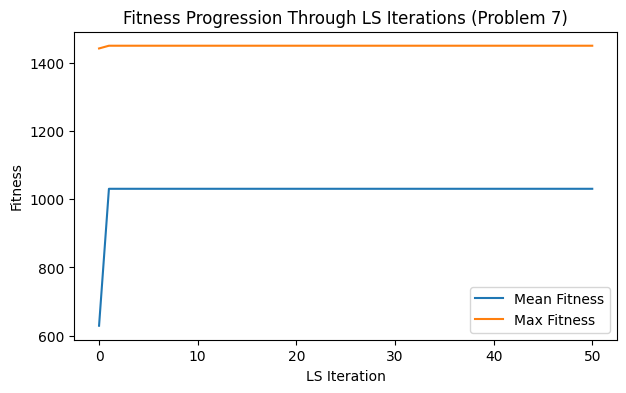


Problem 7:
Best fitness: 1450
Accuracy: 0.733
Selected items: [ 1  2  3  5  9 11 14 15]
Local search improved fitness by 988751
Local search improved fitness by 3024233
Local search improved fitness by 12964811
Local search improved fitness by 12708165
Local search improved fitness by 810066
Local search improved fitness by 1041398
Local search improved fitness by 12497038
Local search improved fitness by 12853228
Local search improved fitness by 1676628
Local search improved fitness by 65731
Local search improved fitness by 13166579
Local search improved fitness by 2213362
Local search improved fitness by 12813519
Local search improved fitness by 69666
Local search improved fitness by 1176795
Local search improved fitness by 3946012
Local search improved fitness by 2002389
Local search improved fitness by 1482993
Local search improved fitness by 1570627
Local search improved fitness by 2519468
Local search improved fitness by 13217904
Local search improved fitness by 12813633
Local s

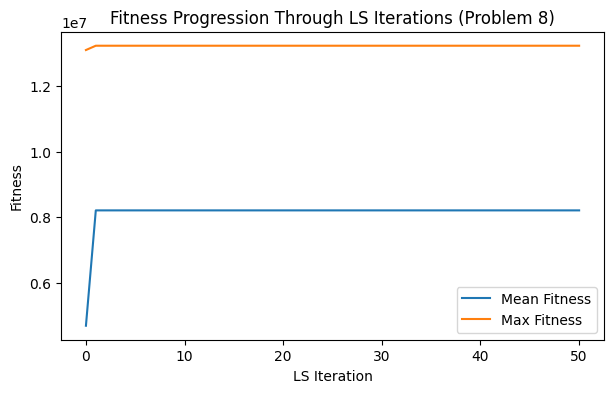


Problem 8:
Best fitness: 13217904
Accuracy: 0.583
Selected items: [ 1  4  5  6  7 10 14 15 16 17 19 20 22 24]


In [24]:
import matplotlib.pyplot as plt

predicted_solutions_ls = []
fitness_scores_list_ls = []
accuracy_list_ls = []

for idx, bag in df.iterrows():
    weights = np.array(bag['weights'])
    values = np.array(bag['values'])
    capacity = bag['capacity']
    n_items = len(weights)
    x_opt = np.array(bag['optimal_solution'])

    # initialize random population
    population = initialize_population_ls(n_items, pop_size)

    # track fitness through LS iterations for plotting
    fitness_history_pop = []

    # apply Local Search to each individual
    improved_population = []
    final_fitness_scores = []

    for ind in population:
        improved_ind, fit, fitness_history = local_search(ind, weights, values, capacity, max_iter=max_iter_ls)
        improved_population.append(improved_ind)
        final_fitness_scores.append(fit)
        fitness_history_pop.append(fitness_history) 

    improved_population = np.array(improved_population)
    final_fitness_scores = np.array(final_fitness_scores)

    # choose the best solution
    best_idx = np.argmax(final_fitness_scores)
    best_solution = improved_population[best_idx]
    predicted_solutions_ls.append(best_solution)
    fitness_scores_list_ls.append(final_fitness_scores[best_idx])

    # compute accuracy
    accuracy = (best_solution == x_opt).sum() / n_items
    accuracy_list_ls.append(accuracy)

    # plot fitness progression for the population 
    mean_fitness_per_iter = np.mean([hist + [hist[-1]]*(max_iter_ls+1-len(hist)) for hist in fitness_history_pop], axis=0)
    max_fitness_per_iter = np.max([hist + [hist[-1]]*(max_iter_ls+1-len(hist)) for hist in fitness_history_pop], axis=0)

    plt.figure(figsize=(7,4))
    plt.plot(mean_fitness_per_iter, label="Mean Fitness")
    plt.plot(max_fitness_per_iter, label="Max Fitness")
    plt.xlabel("LS Iteration")
    plt.ylabel("Fitness")
    plt.title(f"Fitness Progression Through LS Iterations (Problem {idx+1})")
    plt.legend()
    plt.show()

    # display results
    print(f"\nProblem {idx+1}:")
    print(f"Best fitness: {final_fitness_scores[best_idx]}")
    print(f"Accuracy: {accuracy:.3f}")
    selected_items = np.where(best_solution == 1)[0] + 1
    print(f"Selected items: {selected_items}")

In [28]:
print("\nLocal Search Summary:")
print(f"Average fitness: {np.mean(fitness_scores_list_ls):.4f}")
print(f"Average accuracy: {np.mean(accuracy_list_ls):.4f}")


Local Search Summary:
Average fitness: 1652825.7500
Average accuracy: 0.9146
